<a href="https://colab.research.google.com/github/lidyapalupii/UASMPML/blob/main/UAS_MPML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluation**

# **Dataset Selection and Exploration**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/restaurant_menu_optimization_data.csv')
# Display the first few rows of the dataset
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [3]:
# Display the first few rows of the dataset
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [4]:
# Summary statistics of the dataset
print(df.describe())

            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000


In [5]:
# Check for missing values
print(df.isnull().sum())

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


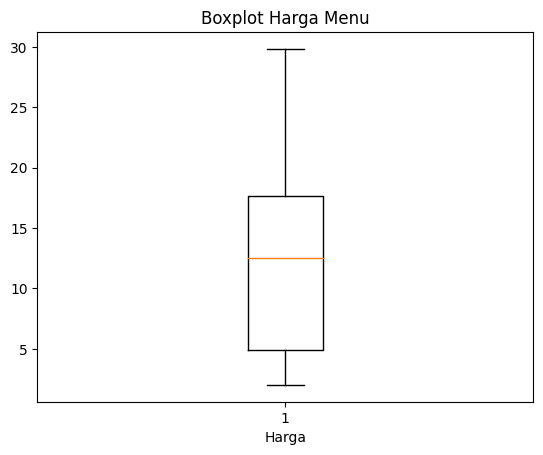

In [6]:
plt.boxplot(df['Price'])
plt.xlabel('Harga')
plt.title('Boxplot Harga Menu')
plt.show()

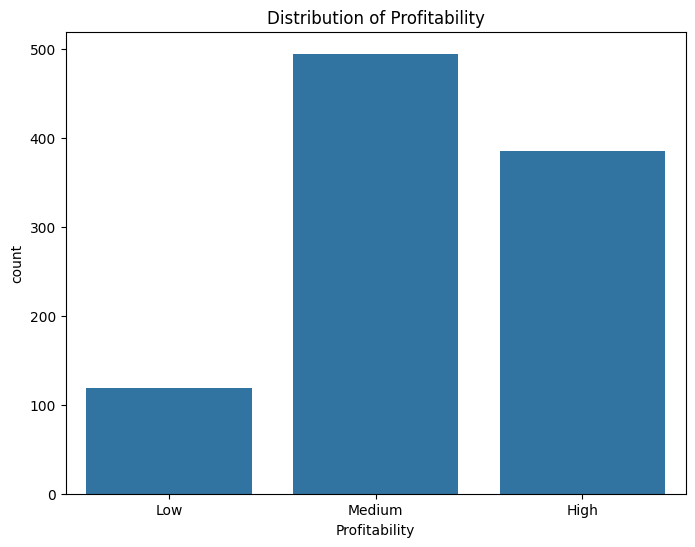

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Profitability')
plt.title('Distribution of Profitability')
plt.show()

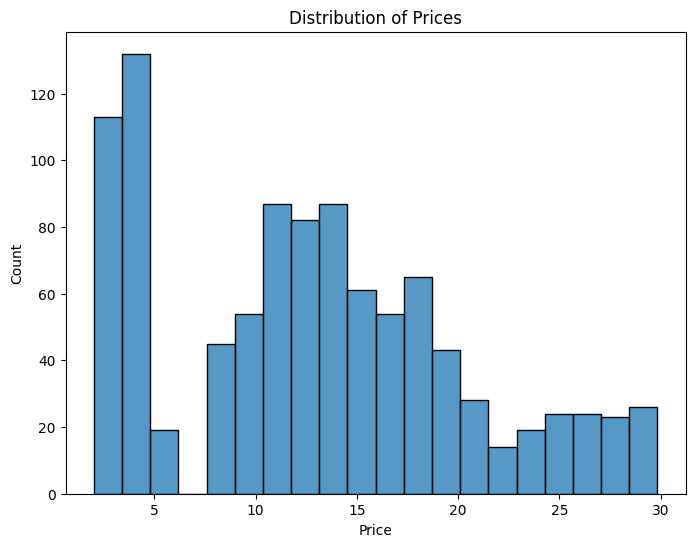

In [ ]:
# Distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20)
plt.title('Distribution of Prices')
plt.show()

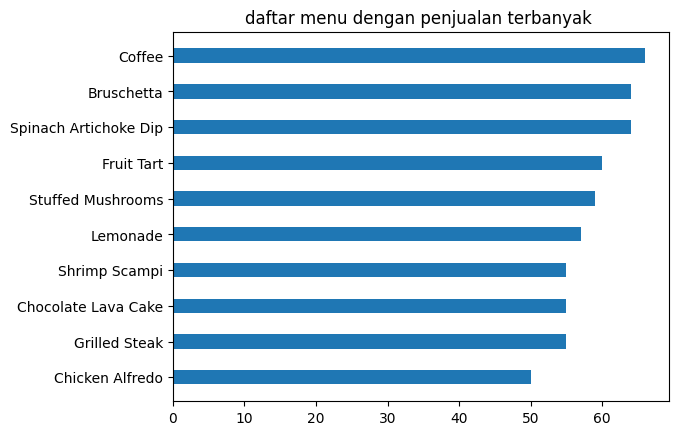

In [7]:
# Separates categorical data from df
obj_data = df.select_dtypes('object')
obj_data.head()

data = obj_data['MenuItem'].value_counts(ascending = True).head(10)
plt.barh(data.index , data.values , height = 0.4)
plt.title('daftar menu dengan penjualan terbanyak ')
plt.show()

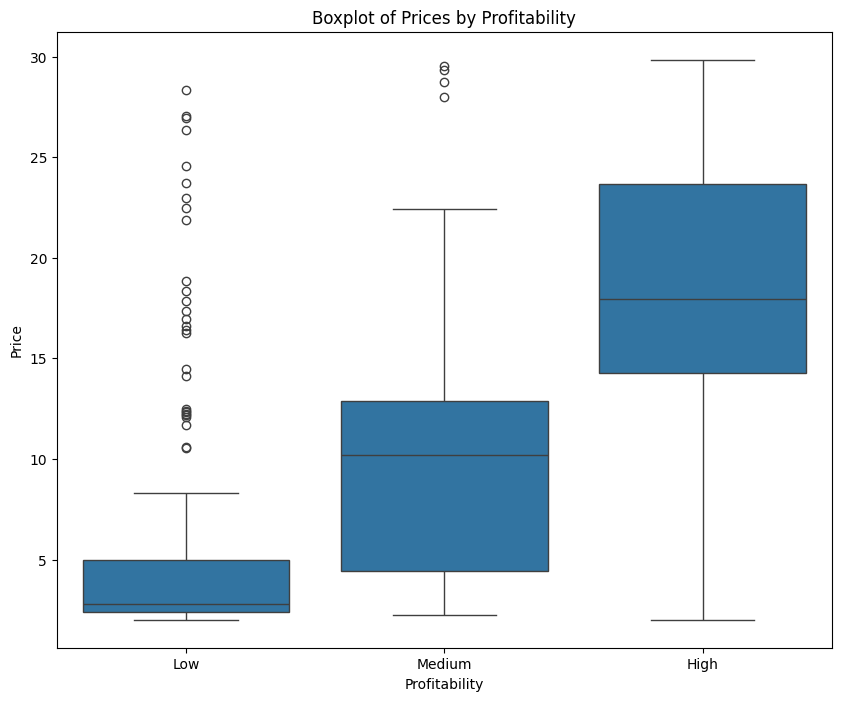

In [ ]:
# Boxplot of prices by profitability
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Profitability', y='Price')
plt.title('Boxplot of Prices by Profitability')
plt.show()

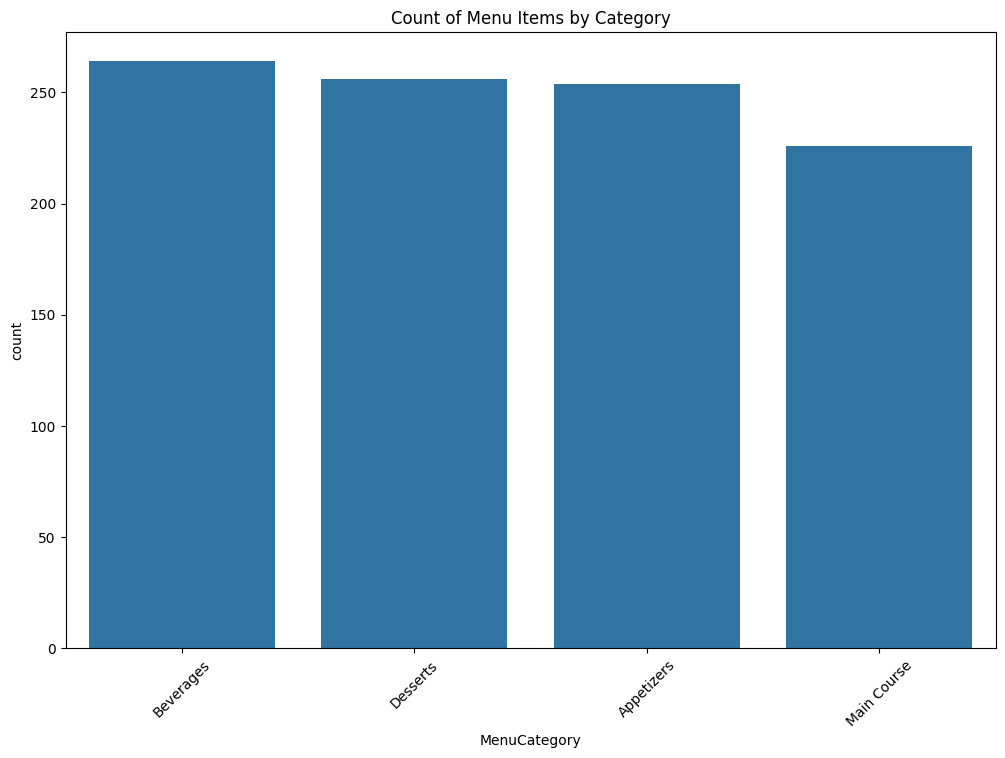

In [ ]:
# Count of menu items by category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='MenuCategory', order=df['MenuCategory'].value_counts().index)
plt.title('Count of Menu Items by Category')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
le_profitability = LabelEncoder()
df['Profitability'] = le_profitability.fit_transform(df['Profitability'])

le_menu_category = LabelEncoder()
df['MenuCategory'] = le_menu_category.fit_transform(df['MenuCategory'])

# Drop unnecessary columns
df.drop(['RestaurantID', 'MenuItem', 'Ingredients'], axis=1, inplace=True)

# Split the dataset into features and target variable
X = df.drop('Profitability', axis=1)
y = df['Profitability']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")

Data preprocessing complete.


# **Model Training and Comparison**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [10]:
# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.00      0.00      0.00        25
           2       0.75      0.92      0.83        98

    accuracy                           0.79       200
   macro avg       0.53      0.60      0.56       200
weighted avg       0.69      0.79      0.73       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.60      0.48      0.53        25
           2       0.86      0.87      0.86        98

    accuracy                           0.82       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.81      0.82      0.82       200



In [12]:
# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.68      0.52      0.59        25
           2       0.87      0.92      0.89        98

    accuracy                           0.85       200
   macro avg       0.81      0.77      0.78       200
weighted avg       0.84      0.85      0.85       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


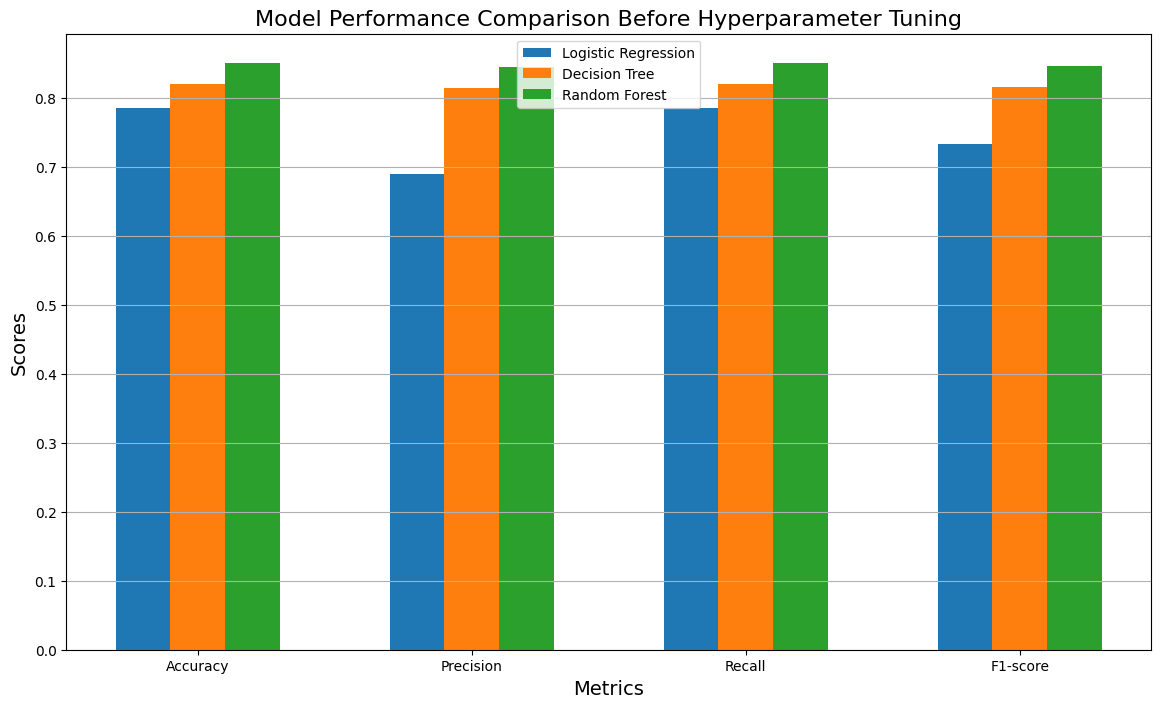

In [14]:
# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Visualisasi perbandingan kinerja model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = range(len(metrics))

plt.figure(figsize=(14, 8))
plt.bar(x, lr_scores, width=0.2, label='Logistic Regression', align='center')
plt.bar([p + 0.2 for p in x], dt_scores, width=0.2, label='Decision Tree', align='center')
plt.bar([p + 0.4 for p in x], rf_scores, width=0.2, label='Random Forest', align='center')

plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Model Performance Comparison Before Hyperparameter Tuning', fontsize=16)
plt.xticks([p + 0.2 for p in x], metrics)
plt.legend()
plt.grid(axis='y')

plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Cross-validation to validate the performance
cv_scores_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')
cv_scores_dt = cross_val_score(dt, X_scaled, y, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')

In [ ]:
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean()}")
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean()}")
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

Logistic Regression CV Accuracy: 0.794
Decision Tree CV Accuracy: 0.85
Random Forest CV Accuracy: 0.875


# **Evaluation**

In [23]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Initialize the GridSearchCV object
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.8


In [24]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the GridSearchCV object
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best score for Decision Tree:", grid_dt.best_score_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score for Decision Tree: 0.91875


In [26]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the GridSearchCV object
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.925


In [27]:
# Retrain Logistic Regression with best hyperparameters
best_lr = LogisticRegression(**grid_lr.best_params_)
best_lr.fit(X_train, y_train)
y_pred_best_lr = best_lr.predict(X_test)
print("Best Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best_lr))

# Retrain Decision Tree with best hyperparameters
best_dt = DecisionTreeClassifier(**grid_dt.best_params_)
best_dt.fit(X_train, y_train)
y_pred_best_dt = best_dt.predict(X_test)
print("Best Decision Tree Performance:")
print(classification_report(y_test, y_pred_best_dt))

# Retrain Random Forest with best hyperparameters
best_rf = RandomForestClassifier(**grid_rf.best_params_)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Best Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.00      0.00      0.00        25
           2       0.76      0.86      0.80        98

    accuracy                           0.77       200
   macro avg       0.51      0.59      0.55       200
weighted avg       0.67      0.77      0.72       200

Best Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        77
           1       0.87      0.52      0.65        25
           2       0.91      0.97      0.94        98

    accuracy                           0.91       200
   macro avg       0.89      0.81      0.84       200
weighted avg       0.90      0.91      0.90       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Random Forest Performance:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        77
           1       0.87      0.52      0.65        25
           2       0.91      0.97      0.94        98

    accuracy                           0.91       200
   macro avg       0.89      0.81      0.84       200
weighted avg       0.90      0.91      0.90       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


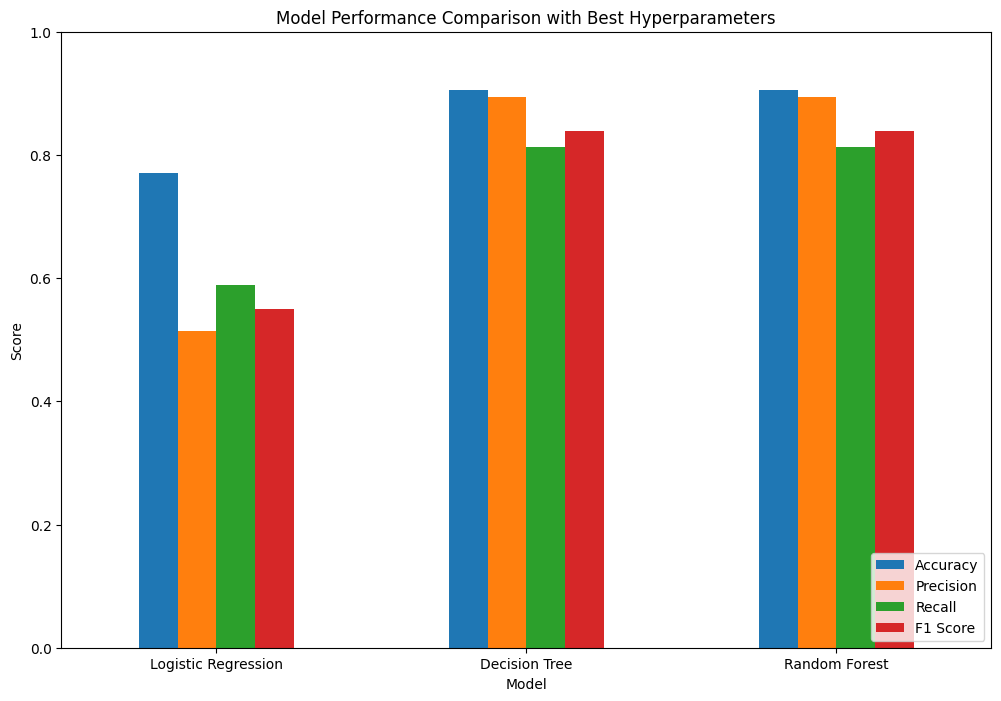

In [28]:
# Initialize models with best hyperparameters
best_models = {
    'Logistic Regression': LogisticRegression(**grid_lr.best_params_),
    'Decision Tree': DecisionTreeClassifier(**grid_dt.best_params_),
    'Random Forest': RandomForestClassifier(**grid_rf.best_params_)
}

# Dictionary to store the results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate models
for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    results['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro'))

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot the results
results_df.plot(x='Model', kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison with Best Hyperparameters')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

# **Cross-Validation**

In [29]:
# Perform cross-validation
def cross_val(model, X, y, cv=5):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision_macro')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall_macro')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')

    print(f"Accuracy: {accuracy.mean():.4f} (+/- {accuracy.std():.4f})")
    print(f"Precision: {precision.mean():.4f} (+/- {precision.std():.4f})")
    print(f"Recall: {recall.mean():.4f} (+/- {recall.std():.4f})")
    print(f"F1 Score: {f1.mean():.4f} (+/- {f1.std():.4f})")
    print()

# Using best hyperparameters from GridSearchCV
best_lr = LogisticRegression(**grid_lr.best_params_)
best_dt = DecisionTreeClassifier(**grid_dt.best_params_)
best_rf = RandomForestClassifier(**grid_rf.best_params_)

print("Cross-Validation Results for Logistic Regression:")
cross_val(best_lr, X, y)

print("Cross-Validation Results for Decision Tree:")
cross_val(best_dt, X, y)

print("Cross-Validation Results for Random Forest:")
cross_val(best_rf, X, y)

Cross-Validation Results for Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Accuracy: 0.7560 (+/- 0.0198)
Precision: 0.5042 (+/- 0.0137)
Recall: 0.5774 (+/- 0.0169)
F1 Score: 0.5372 (+/- 0.0150)

Cross-Validation Results for Decision Tree:
Accuracy: 0.9120 (+/- 0.0216)
Precision: 0.8983 (+/- 0.0261)
Recall: 0.8534 (+/- 0.0333)
F1 Score: 0.8707 (+/- 0.0290)

Cross-Validation Results for Random Forest:
Accuracy: 0.9200 (+/- 0.0263)
Precision: 0.9174 (+/- 0.0261)
Recall: 0.8600 (+/- 0.0358)
F1 Score: 0.8805 (+/- 0.0348)

